In [1]:
import pandas as pd, numpy as np, seaborn as sns, matplotlib.pyplot as plt, statsmodels.api as sm
%matplotlib inline

## Representing a Perceptron

So the perceptron is an artificial neuron that can make a simple decision. Let’s implement one from scratch in Python!

The perceptron has three main components:

* `Inputs`: Each input corresponds to a feature. For example, in the case of a person, features could be age, height, weight, college degree, etc.

* `Weights`: Each input also has a weight which assigns a certain amount of importance to the input. If an input’s weight is large, it means this input plays a bigger role in determining the output. For example, a team’s skill level will have a bigger weight than the average age of players in determining the outcome of a match.

* `Output`: Finally, the perceptron uses the inputs and weights to produce an output. The type of the output varies depending on the nature of the problem. For example, to predict whether or not it’s going to rain, the output has to be binary — 1 for Yes and 0 for No. However, to predict the temperature for the next day, the range of the output has to be larger — say a number from 70 to 90.

## Ques 1
Our Perceptron class by default takes two inputs and a pre-defined weight for each input.

Complete the __init__() method inside the Perceptron class by creating instance variables self.num_inputs and self.weights that represent the attributes of a Perceptron object.

Assign the parameters num_inputs and weights to self.num_inputs and self.weights respectively.

In [2]:
class Perceptron:
    def __init__(self, num_inputs=2, weights=[1,1]):
        self.num_inputs = num_inputs
        self.weights = weights

## Ques 2

Create a Perceptron object called cool_perceptron (without any arguments) and print it out to see what it looks like.

In [3]:
cool_perceptron = Perceptron()
print(cool_perceptron)

## Step 1: Weighted Sum
Great! Now that you understand the structure of the perceptron, here’s an important question — how are the inputs and weights magically turned into an output? This is a two-step process, and the first step is finding the weighted sum of the inputs.

What is the `weighted sum`? This is just a number that gives a reasonable representation of the inputs:



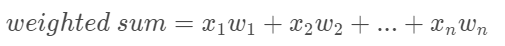

In [5]:
from IPython.display import Image
Image("one.png")

The x‘s are the inputs and the w‘s are the weights.

Here’s how we can implement it:
* Start with a weighted sum of 0. Let’s call it weighted_sum.
* Start with the first input and multiply it by its corresponding weight. Add this result to weighted_sum.
* Go to the next input and multiply it by its corresponding weight. Add this result to weighted_sum.
* Repeat this process for all inputs.

### Ques 1
Create a variable called weighted_sum to hold the value of the weighted sum and set its starting value to 0.

Return weighted_sum outside the for loop.

In [10]:
class Perceptron:
    def __init__(self, num_inputs=2, weights=[2,1]):
        self.num_inputs = num_inputs
        self.weights = weights
    
    def weighted_sum(self, inputs):
    # create variable to store weighted sum
        for i in range(self.num_inputs):
            pass
      # complete this loop
            weighted_sum = 0
        return weighted_sum
cool_perceptron = Perceptron()

### Ques 2
Let’s go through each input-weight pair and find the weighted sum using indexing.

Delete the pass statement inside the for loop. For each iteration in the loop, find the product of the input and weight at index i, add the result to weighted_sum, and store it back in weighted_sum to update the value of weighted_sum.

In [12]:
class Perceptron:
    def __init__(self, num_inputs=2, weights=[2,1]):
        self.num_inputs = num_inputs
        self.weights = weights
    
    def weighted_sum(self, inputs):
        weighted_sum = 0
        for i in range(self.num_inputs):
            weighted_sum += self.weights[i]*inputs[i]
      #complete this loop
        return weighted_sum

### Ques 3
Outside the Perceptron class, after the Perceptron object cool_perceptron has been created, print out the weighted sum for the inputs [24, 55].

What is the weighted sum?

In [13]:
cool_perceptron = Perceptron()
print(cool_perceptron.weighted_sum([24, 55]))

103


## Step 2: Activation Function
After finding the weighted sum, the second step is to constrain the weighted sum to produce a desired output.

Why is that important? Imagine if a perceptron had inputs in the range of 100-1000 but the goal was to simply predict whether or not something would occur — 1 for “Yes” and 0 for “No”. This would result in a very large weighted sum.

How can the perceptron produce a meaningful output in this case? This is exactly where activation functions come in! These are special functions that transform the weighted sum into a desired and constrained output.

For example, if you want to train a perceptron to detect whether a point is above or below a line (which we will be doing in this lesson!), you might want the output to be a +1 or -1 label. For this task, you can use the “sign activation function” to help the perceptron make the decision:

* If weighted sum is positive, return +1
* If weighted sum is negative, return -1

In this lesson, we will focus on using the sign activation function because it is the simplest way to get started with perceptrons and eventually visualize one in action.

### Ques 1
Inside the .activation() method, return 1 if the weighted_sum is greater than or equal to 0.

In [17]:
class Perceptron:
    def __init__(self, num_inputs=2, weights=[1,1]):
        self.num_inputs = num_inputs
        self.weights = weights
    
    def weighted_sum(self, inputs):
        weighted_sum = 0
        for i in range(self.num_inputs):
            weighted_sum += self.weights[i]*inputs[i]
        return weighted_sum
  
    def activation(self, weighted_sum):
    #Complete this method
        if weighted_sum >= 0:
            return 1

cool_perceptron = Perceptron()
print(cool_perceptron.weighted_sum([24, 55]))

79


### Ques 2
Inside the .activation() method, return -1 if the weighted_sum is less than 0.

In [19]:
class Perceptron:
    def __init__(self, num_inputs=2, weights=[1,1]):
        self.num_inputs = num_inputs
        self.weights = weights
    
    def weighted_sum(self, inputs):
        weighted_sum = 0
        for i in range(self.num_inputs):
            weighted_sum += self.weights[i]*inputs[i]
        return weighted_sum
  
    def activation(self, weighted_sum):
    #Complete this method
        if weighted_sum >= 0:
            return 1
        if weighted_sum < 0:
            return -1

cool_perceptron = Perceptron()
print(cool_perceptron.weighted_sum([24, 55]))

79


### Ques 3 
Try it out for yourself!

Print out the result of the method .activation() called on cool_perceptron if the weighted sum is 52.

In [20]:
print(cool_perceptron.activation(52))

1


## Training the Perceptron

Our perceptron can now make a prediction given inputs, but how do we know if it gets those predictions right?

Our perceptron can now make a prediction given inputs, but how do we know if it gets those predictions right?

On the right, you can see a plot of scattered points with positive and negative labels. This is a simple training set.

In the code, the training set has been represented as a dictionary with coordinates as keys and labels as values. For example:


training_set = {(18, 49): -1, (2, 17): 1, (24, 35): -1, (14, 26): 1, (17, 34): -1}


We can measure the perceptron’s actual performance against this training set. By doing so, we get a sense of “how bad” the perceptron is. The goal is to gradually nudge the perceptron — by slightly changing its weights — towards a better version of itself that correctly matches all the input-output pairs in the training set.

We will use these points to train the perceptron to correctly separate the positive labels from the negative labels by visualizing the perceptron as a line. Stay tuned!

### Training Error

Now that we have our training set, we can start feeding inputs into the perceptron and comparing the actual outputs against the expected labels!

Every time the output mismatches the expected label, we say that the perceptron has made a training error — a quantity that measures “how bad” the perceptron is performing.

As mentioned in the last exercise, the goal is to nudge the perceptron towards zero training error. The training error is calculated by subtracting the predicted label value from the actual label value.

**Training error = actual label - predicted label**

For each point in the training set, the perceptron either produces a +1 or a -1 (as we are using the Sign Activation Function). Since the labels are also a +1 or a -1, there are four different possibilities for the error the perceptron makes:

| Actual | Predicted | Training Error | | --- | --- | --- | | +1 | +1 | 0 | | +1 | -1 | 2 | | -1 | -1 | 0 | | -1 | +1 | -2 |

These training error values will be crucial in improving the perceptron’s performance as we will see in the upcoming exercises.


### Ques 1
In the .training() method, let’s find the perceptron’s error on each inputs in training_set.

First, we need the perceptron’s predicted output for a point. Inside the for loop, create a variable called prediction and assign it the correct label value using .activation(), .weighted_sum(), and inputs in a single statement.

In [38]:
class Perceptron:
    def __init__(self, num_inputs=2, weights=[1,1]):
        self.num_inputs = num_inputs
        self.weights = weights
    
    def weighted_sum(self, inputs):
        weighted_sum = 0
        for i in range(self.num_inputs):
              weighted_sum += self.weights[i]*inputs[i]
        return weighted_sum
  
    def activation(self, weighted_sum):
        if weighted_sum >= 0:
            return 1
        if weighted_sum < 0:
            return -1
    
    def training(self, training_set):
        for inputs in training_set:
            prediction = self.activation(self.weighted_sum(inputs))   ## here is the added text..

      
cool_perceptron = Perceptron()
print(cool_perceptron.weighted_sum([24, 55]))
print(cool_perceptron.activation(52))

79
1


### Ques 2
Create a variable named actual and assign it the actual label for each inputs in training_set.

In [39]:
class Perceptron:
    def __init__(self, num_inputs=2, weights=[1,1]):
        self.num_inputs = num_inputs
        self.weights = weights
    
    def weighted_sum(self, inputs):
        weighted_sum = 0
        for i in range(self.num_inputs):
            weighted_sum += self.weights[i]*inputs[i]
        return weighted_sum
  
    def activation(self, weighted_sum):
        if weighted_sum >= 0:
            return 1
        if weighted_sum < 0:
            return -1
    
    def training(self, training_set):
        for inputs in training_set:
            prediction = self.activation(self.weighted_sum(inputs))
            actual = training_set[inputs]           ## This code got added
        
cool_perceptron = Perceptron()
print(cool_perceptron.weighted_sum([24, 55]))
print(cool_perceptron.activation(52))

79
1


### Ques 3
Create a variable called error and assign it the value of actual - prediction.

In [40]:
class Perceptron:
    def __init__(self, num_inputs=2, weights=[1,1]):
        self.num_inputs = num_inputs
        self.weights = weights
    
    def weighted_sum(self, inputs):
        weighted_sum = 0
        for i in range(self.num_inputs):
            weighted_sum += self.weights[i]*inputs[i]
        return weighted_sum
  
    def activation(self, weighted_sum):
        if weighted_sum >= 0:
            return 1
        if weighted_sum < 0:
            return -1
    
    def training(self, training_set):
        for inputs in training_set:
            prediction = self.activation(self.weighted_sum(inputs))
            actual = training_set[inputs]
            error = actual - prediction    ## This is the line we introduced
      
cool_perceptron = Perceptron()
print(cool_perceptron.weighted_sum([24, 55]))
print(cool_perceptron.activation(52))

79
1


## Tweaking the Weights

What do we do once we have the errors for the perceptron? We slowly nudge the perceptron towards a better version of itself that eventually has zero error.

The only way to do that is to change the parameters that define the perceptron. We can’t change the inputs so the only thing that can be tweaked are the weights. As we change the weights, the outputs change as well.

The goal is to find the optimal combination of weights that will produce the correct output for as many points as possible in the dataset.

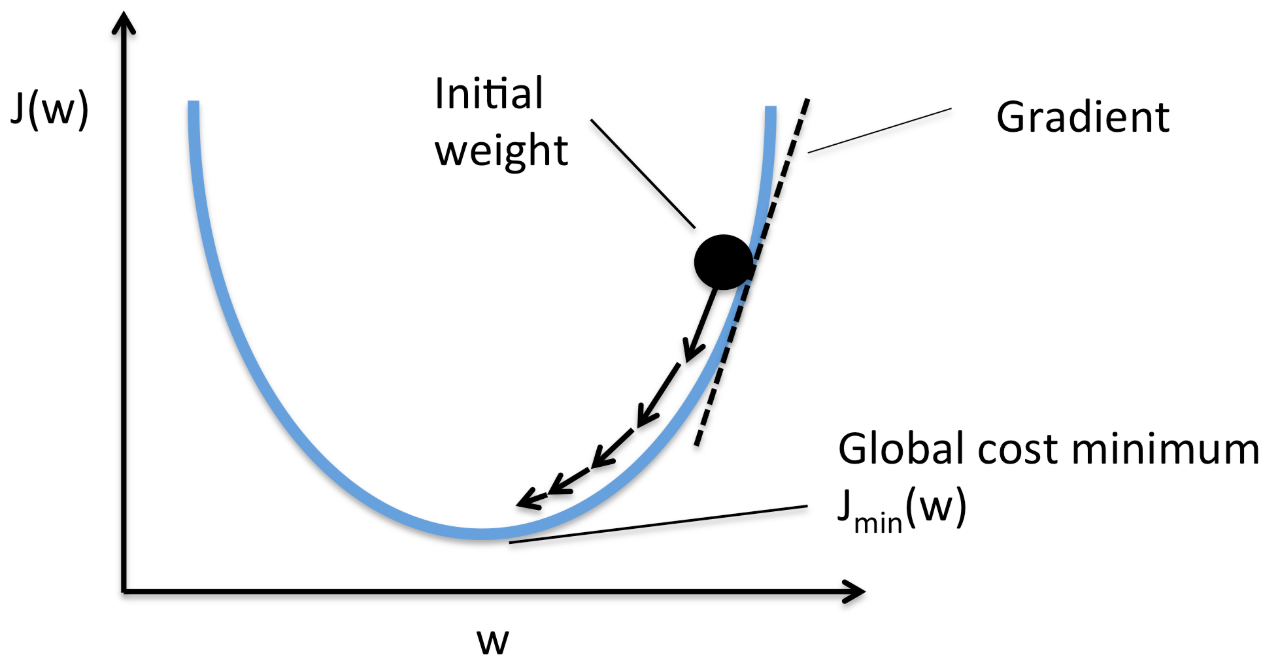

In [26]:
Image('fifty.png')

## The Perceptron Algorithm

But one question still remains — how do we tweak the weights optimally? We can’t just play around randomly with the weights until the correct combination magically pops up. There needs to be a way to guarantee that the perceptron improves its performance over time.

This is where the Perceptron Algorithm comes in. The math behind why this works is outside the scope of this lesson, so we’ll directly apply the algorithm to optimally tweak the weights and nudge the perceptron towards zero error.

The most important part of the algorithm is the update rule where the weights get updated:

    **weight = weight + (error * input)**
    
We keep on tweaking the weights until all possible labels are correctly predicted by the perceptron. This means that multiple passes might need to be made through the training_set before the Perceptron Algorithm comes to a halt.


In this exercise, you will continue to work on the .training() method. We have made the following changes to this method from the last exercise:

* `foundLine = False` (a boolean that indicates whether the perceptron has found a line to separate the positive and negative labels)
* `while not foundLine`: (a while loop that continues to train the perceptron until the line is found)
* `total_error = 0` (to count the total error the perceptron makes in each round)
* `total_error += abs(error)` (to update the total error the perceptron makes in each round)
  
 

### Ques 1 
If the algorithm doesn’t find an error, the perceptron must have correctly predicted the labels for all points.

Outside the for loop (but inside the while loop), change the value of foundLine to True if total_error equals 0.

In [ ]:
class Perceptron:
  def __init__(self, num_inputs=2, weights=[1,1]):
    self.num_inputs = num_inputs
    self.weights = weights
    
  def weighted_sum(self, inputs):
    weighted_sum = 0
    for i in range(self.num_inputs):
      weighted_sum += self.weights[i]*inputs[i]
    return weighted_sum
  
  def activation(self, weighted_sum):
    if weighted_sum >= 0:
      return 1
    if weighted_sum < 0:
      return -1
    
  def training(self, training_set):
    foundLine = False
    while not foundLine:
      total_error = 0
      for inputs in training_set:
        prediction = self.activation(self.weighted_sum(inputs))
        actual = training_set[inputs]
        error = actual - prediction
        total_error += abs(error)
        if total_error == 0:   ### This line
          foundLine = True     ### this line got added up
      
cool_perceptron = Perceptron()
small_training_set = {(0,3):1, (3,0):-1, (0,-3):-1, (-3,0):1}

### Ques 2

In order to update the weight for each inputs, create another for loop (inside the existing for loop) that iterates a loop variable i through a range of self.num_inputs.


Inside the second for loop, update each weight self.weights[i] by applying the update rule:

**weight = weight + (error * input)**


Great job! Now give it a try for yourself.

Train cool_perceptron using small_training_set.

In [27]:
class Perceptron:
  def __init__(self, num_inputs=2, weights=[1,1]):
    self.num_inputs = num_inputs
    self.weights = weights
    
  def weighted_sum(self, inputs):
    weighted_sum = 0
    for i in range(self.num_inputs):
      weighted_sum += self.weights[i]*inputs[i]
    return weighted_sum
  
  def activation(self, weighted_sum):
    if weighted_sum >= 0:
      return 1
    if weighted_sum < 0:
      return -1
    
  def training(self, training_set):
    foundLine = False
    while not foundLine:
      total_error = 0
      for inputs in training_set:
        prediction = self.activation(self.weighted_sum(inputs))
        actual = training_set[inputs]
        error = actual - prediction
        total_error += abs(error)
        for i in range(self.num_inputs):
          self.weights[i] += error*inputs[i]
      if total_error == 0:
        foundLine = True
      
cool_perceptron = Perceptron()
small_training_set = {(0,3):1, (3,0):-1, (0,-3):-1, (-3,0):1}
cool_perceptron.training(small_training_set)
print(cool_perceptron.weights)

[-5, 1]


## The Bias Weight

You have understood that the perceptron can be trained to produce correct outputs by tweaking the regular weights.

However, there are times when a minor adjustment is needed for the perceptron to be more accurate. This supporting role is played by the bias weight. It takes a default input value of 1 and some random weight value.

So now the weighted sum equation should look like:
    
**weighted sum = x1w1 + x2w2 + ...+ xnwn + 1wb**

How does this change the code so far? You only have to consider two small changes:

* Add a 1 to the set of inputs (now there are 3 inputs instead of 2)
* Add a bias weight to the list of weights (now there are 3 weights instead of 2)

We’ll automatically make these replacements in the code so you should be good to go!

## Representing a Line

So far so good! The perceptron works as expected, but everything seems to be taking place behind the scenes. What if we could visualize the perceptron’s training process to gain a better understanding of what’s going on?

The weights change throughout the training process so if only we could meaningfully visualize those weights …

Turns out we can! In fact, it gets better. The weights can actually be used to represent a line! This greatly simplifies our visualization.

You might know that a line can be represented using the slope-intercept form. A perceptron’s weights can be used to find the slope and intercept of the line that the perceptron represents.

* slope = -self.weights[0]/self.weights[1]
* intercept = -self.weights[2]/self.weights[1]

The explanation for these equations is beyond the scope of this lesson, so we’ll just use them to visualize the perceptron for now.

In the plot on your right, you should be able to see a line that represents the perceptron in its first iteration of the training process.

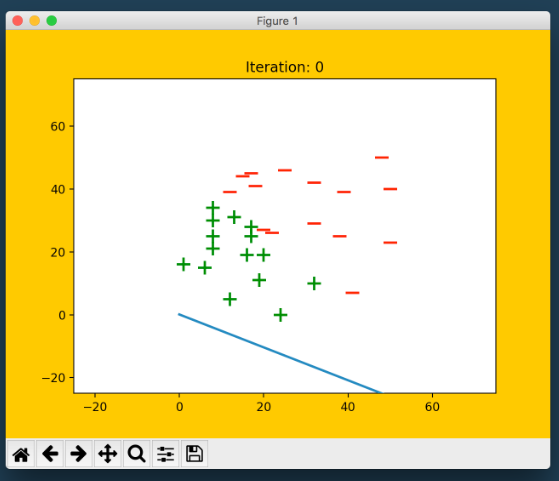

In [29]:
Image('nine.png')

## Finding a Linear Classifier

Let’s recap what you just learned!

The perceptron has inputs, weights, and an output. The weights are parameters that define the perceptron and they can be used to represent a line. In other words, the perceptron can be visualized as a line.

What does it mean for the perceptron to correctly classify every point in the training set?

Theoretically, it means that the perceptron predicted every label correctly.

Visually, it means that the perceptron found a linear classifier, or a decision boundary, that separates the two distinct set of points in the training set.

In the plot on the right, you should be able to see the linear classifier that was found by the perceptron in the last iteration of the training process.

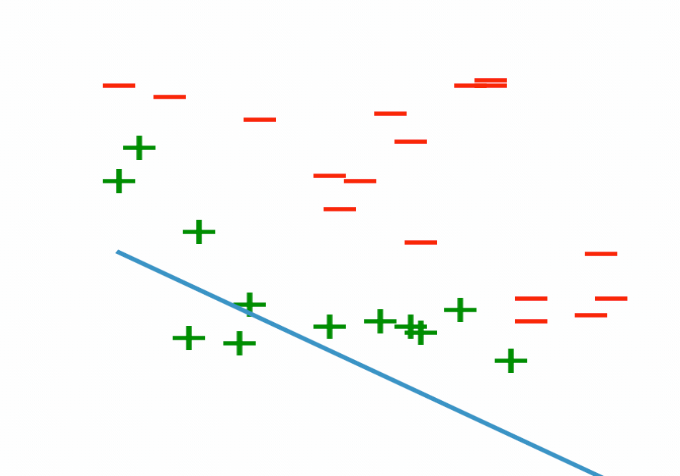

In [34]:
## Inintial plotted line..
Image('eighty.png')

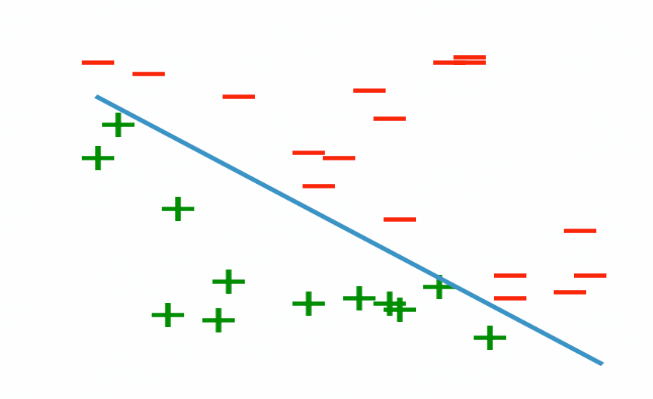

In [33]:
## This has happened just in the last iteration..
Image('forty.png')


## What's Next? Neural Networks

Congratulations! You have now built your own perceptron from scratch.

Let’s step back and think about what you just accomplished and see if there are any limits to a single perceptron.

Earlier, the data points in the training set were linearly separable i.e. a single line could easily separate the two dissimilar sets of points.


What would happen if the data points were scattered in such a way that a line could no longer classify the points? A single perceptron with only two inputs wouldn’t work for such a scenario because it cannot represent a non-linear decision boundary.

That’s when more perceptrons and features come into play!


By increasing the number of features and perceptrons, we can give rise to the Multilayer Perceptrons, also known as Neural Networks, which can solve much more complicated problems.

With a solid understanding of perceptrons, you are now ready to dive into the incredible world of Neural Networks!